# Step A - Multiple Product Detection

Test on scene image: {e1.png, e2.png, e3.png, e4.png, e5.png} 
Use product images: {0.jpg, 1.jpg, 11.jpg, 19.jpg, 24.jpg, 26.jpg, 25.jpg}

Develop an object detection system to identify single instance of products given: one reference image for each item and a scene image. The system should be able to correctly identify all the product in the shelves image. One way to solve this task could be the use of local invariant feature as explained in lab session 5.

In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [23]:
img1 = cv2.imread('models/0.jpg', cv2.IMREAD_GRAYSCALE) #queryImage
print("Shape Image1 :", img1.shape)
img2 = cv2.imread('scenes/e1.png', cv2.IMREAD_GRAYSCALE) #trainImage
print("Shape Image2 :",img2.shape)

Shape Image1 : (1500, 1105)
Shape Image2 : (458, 627)


### Brute-Force Matching with ORB Descriptors

In [27]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [28]:
des1.shape

(500, 32)

In [33]:
len(kp1)

500

In [34]:
img1.shape

(1500, 1105)

In [35]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [36]:
# Match descriptors.
matches = bf.match(des1,des2)

In [37]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

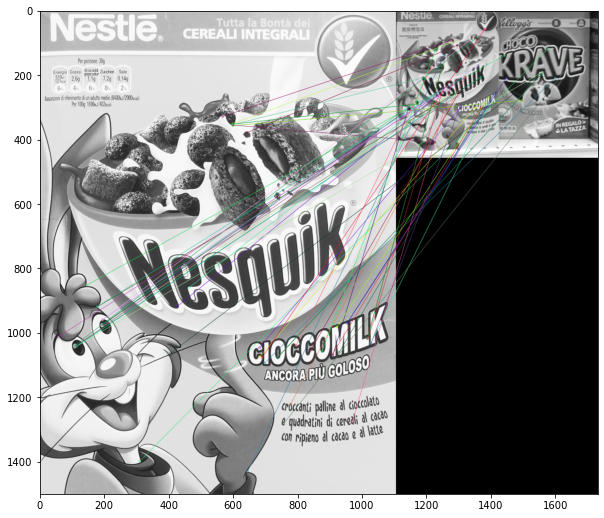

In [39]:
# Draw first 50 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure( figsize=(10,10))
plt.imshow(img3)
plt.show()

### Brute-Force Matching with SIFT Descriptors and Ratio Test

In [99]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

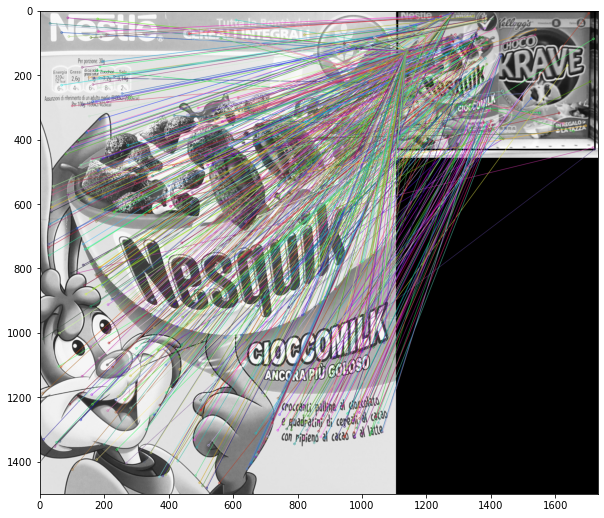

In [100]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.show()

In [44]:
good[187][0].trainIdx

467

In [45]:
len(kp2)

2164

In [46]:
# Apply good matches to keypoints
good_kp = []
for m in good:
    good_kp.append(kp2[m[0].trainIdx])

In [47]:
len(good_kp)

545

In [48]:
len(good)

545

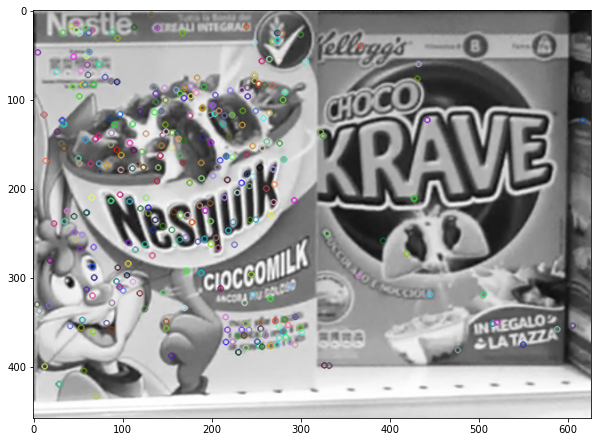

In [49]:

img2_with_good_keypoints = cv2.drawKeypoints(img2,good_kp,img2)

plt.figure(figsize=(10,10))
plt.imshow(img2_with_good_keypoints)
plt.show()

In [50]:
good_kp[0].pt

(59.699951171875, 226.98765563964844)

In [51]:
all_pts_x = np.array([kp.pt[0] for kp in good_kp])
all_pts_y = np.array([kp.pt[1] for kp in good_kp])

In [52]:
x_min = all_pts_x.min()
x_max = all_pts_x.max()
y_min = all_pts_y.min()
y_max = all_pts_y.max()

In [53]:
x_min

4.178146839141846

In [54]:
pts = np.array([[x_min, y_min],
               [x_min, y_max],
                [x_max, y_max],
               [x_max, y_min]], dtype=int)
pts

array([[  4,   4],
       [  4, 432],
       [617, 432],
       [617,   4]])

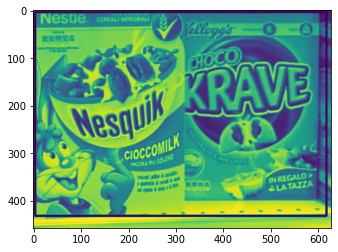

In [55]:
img2_with_draw = cv2.polylines(img2, [pts], 
                      isClosed=True, color=(0,255,0), thickness=4)
plt.imshow(img2_with_draw)
plt.show()

---------

In [633]:
image = cv2.imread('scenes/e1.png')
image.shape

(458, 627, 3)

In [634]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

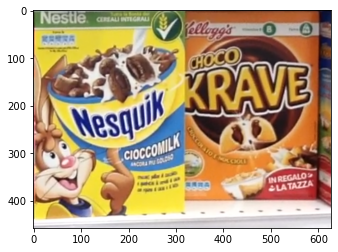

In [635]:
plt.imshow(image_rgb)

In [636]:
points = np.array([[0,0],[0,450],[300,450], [300,0]])
points

array([[  0,   0],
       [  0, 450],
       [300, 450],
       [300,   0]])

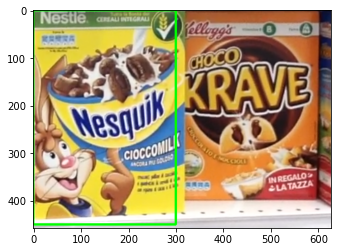

In [637]:

  
# Using cv2.polylines() method
imagewithdraw = cv2.polylines(image_rgb, [points], 
                      isClosed=True, color=(0,255,0), thickness=4)
plt.imshow(imagewithdraw)
plt.show()

______

In [638]:
img1 = cv2.imread('scenes/e1.png', cv2.IMREAD_GRAYSCALE)
img1.shape

(458, 627)

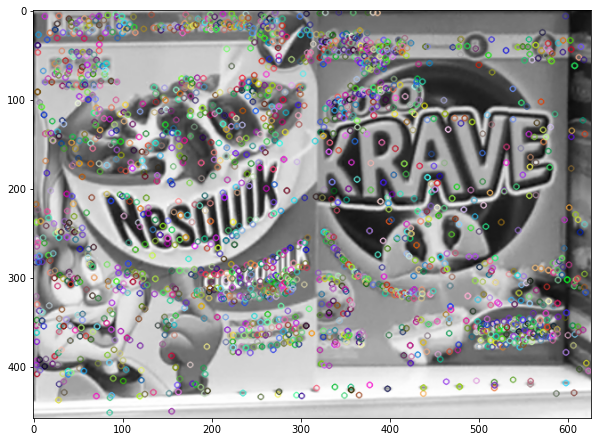

2164
2164


In [639]:
# plot keypoints
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(img1, None)
img_with_keypoints = cv2.drawKeypoints(img1,keypoints,img1)

plt.figure(figsize=(10,10))
plt.imshow(img_with_keypoints)
plt.show()

print(len(keypoints))
print(len(descriptors))

In [640]:
descriptors.shape

(2164, 128)

_____
# Test with Homography Detector

In [360]:
a = cv2.imread('models/0.jpg')
b = cv2.imread('scenes/e1.png')
img_object = cv2.cvtColor(a,cv2.COLOR_BGR2RGB) #queryImage
img_scene = cv2.cvtColor(b,cv2.COLOR_BGR2RGB) #trainImage

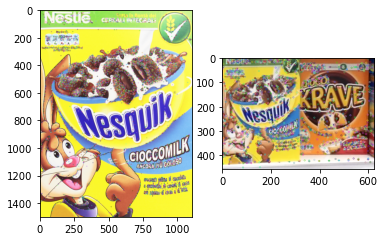

In [361]:
#-- Step 1: Detect the keypoints using SURF Detector
detector = cv2.SIFT_create()
keypoints_object, descriptors_object = detector.detectAndCompute(img_object, None)
keypoints_scene, descriptors_scene = detector.detectAndCompute(img_scene, None)

#-- Draw keypoints
img_object_keypoints = cv2.drawKeypoints(img_object, keypoints_object, img_object_keypoints)
img_scene_keypoints = cv2.drawKeypoints(img_scene, keypoints_scene, img_scene_keypoints)

#-- Show detected (drawn) keypoints
plt.subplot(1, 2, 1)
plt.imshow(img_object_keypoints)

plt.subplot(1, 2, 2)
plt.imshow(img_scene_keypoints)

plt.show()

In [348]:
#-- compute Matches
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
matches = matcher.knnMatch(descriptors_object, descriptors_scene, k=2)

#-- store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

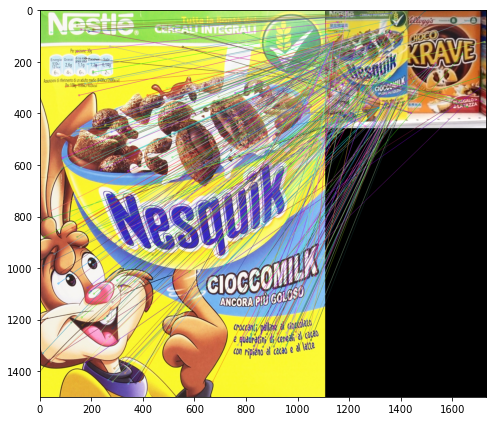

In [349]:
# cv.drawMatchesKnn expects list of lists as matches.
img_drawn_matches = cv2.drawMatchesKnn(img_object,keypoints_object,
                                       img_scene,keypoints_scene,
                                       [good],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(8,8))
plt.imshow(img_drawn_matches)
plt.show()

In [350]:
#-- Localize the object
#-- Get the keypoints from the good matches
obj = np.float32([ keypoints_object[m.queryIdx].pt for m in good ])
scene = np.float32([ keypoints_scene[m.trainIdx].pt for m in good ])
obj.shape

(361, 2)

In [351]:
H, _ =  cv2.findHomography(obj, scene, cv2.RANSAC)

In [352]:
H

array([[ 2.88332754e-01, -3.01452852e-04,  7.84654087e+00],
       [-5.20548758e-03,  2.93097195e-01,  1.39053699e+00],
       [ 2.09965928e-05,  2.10647642e-06,  1.00000000e+00]])

In [353]:
#-- Get the corners from the image object ( the object to be "detected" )
obj_corners = np.empty((4,1,2), dtype=np.float32)
obj_corners[0,0,0] = 0
obj_corners[0,0,1] = 0
obj_corners[1,0,0] = img_object.shape[1]
obj_corners[1,0,1] = 0
obj_corners[2,0,0] = img_object.shape[1]
obj_corners[2,0,1] = img_object.shape[0]
obj_corners[3,0,0] = 0
obj_corners[3,0,1] = img_object.shape[0]
obj_corners

# Other way
#h,w = img_object.shape
#obj_corners = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

array([[[   0.,    0.]],

       [[1105.,    0.]],

       [[1105., 1500.]],

       [[   0., 1500.]]], dtype=float32)

In [354]:
scene_corners = cv2.perspectiveTransform(obj_corners, H)
scene_corners

array([[[  7.846541 ,   1.390537 ]],

       [[319.05185  ,  -4.2626286]],

       [[317.62906  , 424.10446  ]],

       [[  7.3710713, 439.64716  ]]], dtype=float32)

In [355]:
#-- Draw lines between the corners (the mapped object in the scene - image_2 )
img_scene_with_lines = img_scene.copy()
cv2.polylines(img_scene_with_lines, [np.int32(scene_corners)], isClosed=True, color=(0,255,0), thickness=2)

array([[[177, 182, 176],
        [178, 184, 176],
        [179, 187, 178],
        ...,
        [  8,   9,  31],
        [  8,   9,  31],
        [  8,  10,  32]],

       [[162, 167, 159],
        [162, 169, 159],
        [165, 173, 161],
        ...,
        [ 11,  12,  35],
        [ 11,  13,  36],
        [ 11,  14,  37]],

       [[133, 138, 128],
        [134, 141, 128],
        [140, 148, 133],
        ...,
        [ 14,  16,  40],
        [ 14,  17,  41],
        [ 14,  17,  42]],

       ...,

       [[191, 189, 195],
        [192, 190, 197],
        [192, 190, 198],
        ...,
        [246, 245, 248],
        [246, 245, 248],
        [246, 245, 248]],

       [[193, 191, 198],
        [195, 193, 200],
        [196, 194, 201],
        ...,
        [248, 246, 250],
        [247, 246, 249],
        [247, 245, 249]],

       [[205, 204, 210],
        [206, 205, 212],
        [207, 205, 213],
        ...,
        [248, 247, 250],
        [248, 246, 250],
        [247, 246, 249]]

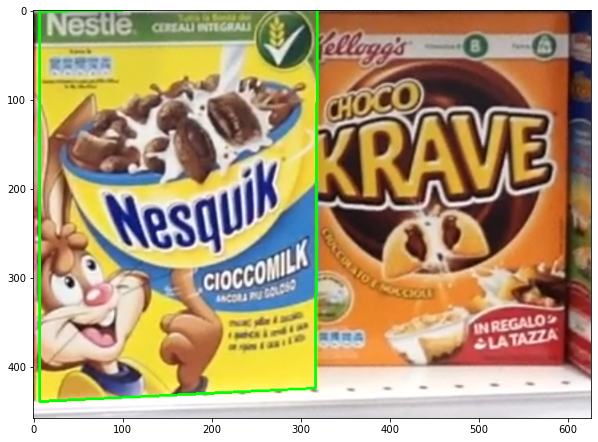

In [356]:
plt.figure(figsize=(10, 10))
plt.imshow(img_scene_with_lines)
plt.show()

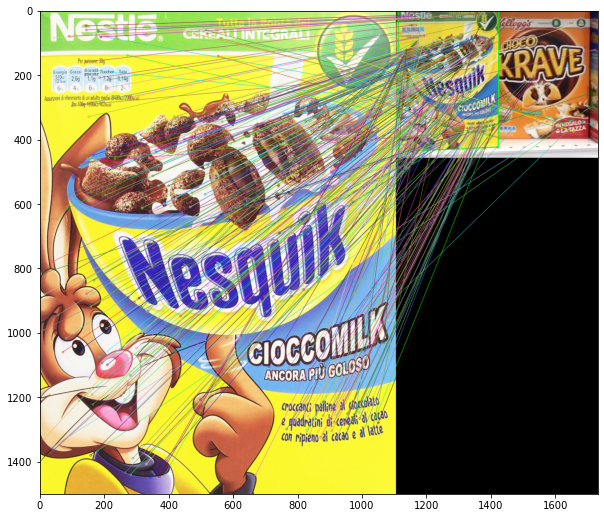

In [357]:
img_drawn_matches = cv2.drawMatchesKnn(img_object,keypoints_object,
                                       img_scene_with_lines,keypoints_scene,
                                       [good],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img_drawn_matches, cmap='gray')
plt.show()